# Principal Component Analysis

More of an unsupervised learning algorithm. Helps in reduing the dimensions of a dataset


PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data. For example:

## Libraries

In [ ]:
## Jupyter Key Board Short Cuts
to add a cell or row        - press alt key - enter
to executee a cell          - press ctrl key - enter

to delete a cell 
                 - press esc key- then press ctrl key - then press D


to copy multiple cells - press esc key- select the cells - then press c to copy the cells

to paste what you copieed - press esc key -- select the cell you want to paste--press ctrl-v

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# PROBLEM STATEMENT
        
       Perform Dimensionality reduction on cancer data using Principal Component analysis

## The Data

## Breast Cancer Dataset in scikit learn as it has many features

In [7]:
### this is only for practice and our learning.
### in real world, always use read_csv to read from the input file
from sklearn.datasets import load_breast_cancer

In [8]:
cancer_pca = load_breast_cancer()

In [13]:
type(cancer_pca)       #### acts like a dictionary

sklearn.utils.Bunch

In [9]:
### get the keys of the dataset
cancer_pca.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
print(cancer_pca['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
print(cancer_pca['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [12]:
### Describe the dataset calling the DESCR key
print(cancer_pca['DESCR'])

### we have 569 observations
### no of attributes is 30 numeric 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [2]:
#STEP.1 - DATA INGESTION

In [13]:
# here header 0 means the 0 th row is our coloumn name
cancer_pca=pd.read_csv("can_data.csv",header=0)

# have a look at the data

# as u can see our data have imported and having 33 columns

In [14]:
### load the cancer data into a data frame
df_pca = pd.DataFrame(cancer_pca['data'],columns=cancer_pca['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

KeyError: 'data'

In [35]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [16]:
### look at the top 5 rows
df_pca.head()

NameError: name 'df_pca' is not defined

In [15]:
### view the target variable
cancer_pca['target']

KeyError: 'target'

In [9]:
### look at the levels or names  of target values ussing key "target_names"
cancer_pca['target_names']

array(['malignant', 'benign'], dtype='<U9')

## PCA Visualization

It is difficult to visualize high dimensional data, 
PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. 
Scale our data is important so that each feature has a single unit variance.

## In case our dataset has Non Numeric or Categorical values
   - we use .categorical function in python to convert the categorical values to numeric
   - then do scaling of the dataset

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
### 
scaler_pca = StandardScaler()

### fit the scale to our dataframe
scaler_pca.fit(df_pca)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
### transform the data 
scaled_pca_data = scaler_pca.transform(df_pca)

In [40]:
df_pca.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [41]:
scaled_pca_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. 

Instantiate a PCA object, find the principal components using the fit method, 

Then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [42]:
### decomposing the dataset into principal components

from sklearn.decomposition import PCA

In [43]:
### we can specify the number of components 
### most of the times a good pca model will have only 1 or 2 Principal components

pca = PCA(n_components=2)

## this will help us to visualize the 30 dimensions into 2 components

In [44]:
pca.fit(scaled_pca_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
## find the variance of each column 

print(pca.explained_variance_ratio_)

## what is the use of seeing the variance? 
## variance is a method of dispersion. by understanding the variance we understand how the values in each column(principal components)
## is spread across their individual means
## principal component1(pc1) seems to have a variance of .44 and Principal component2(pc2) has the variance of .189
### pc1 has a better spread meaning, it has the possibility of explaining the original dataset better than pc2.
### pc1 represents the original dataset better than pc2. 44%

[0.44272026 0.18971182]


In [46]:
### view the first PCA
first_pca = pca.components_[0]

print(first_pca)

### MY First pca (pc1) 

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]


In [47]:
second_pca = pca.components_[1]
print(second_pca)

[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


Now we can transform this data to its first 2 principal components.

In [49]:
### transforms the scaled data 
x_pca = pca.transform(scaled_pca_data)

In [50]:
scaled_pca_data.shape

### scaled data is 569, 30 dimensions

(569, 30)

In [51]:
x_pca.shape
## note dimensions is reduced to 2

(569, 2)

Text(0,0.5,'Second Principal Component')

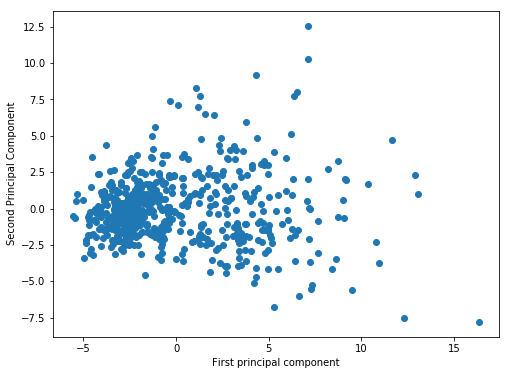

In [52]:
### visualize the Principal components created 

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


#### data seems to be plotted by first and second . interpreting the components is not easy

Text(0,0.5,'Second Principal Component')

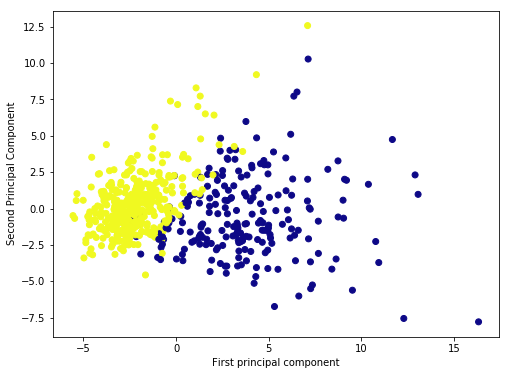

In [53]:
### but the same plot can be visualized based on the "target" column values which is M and B (MALIGNANT and Benign)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer_pca['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### we can see a clear separation between 2 componeents

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [54]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [56]:
df_comp = pd.DataFrame(pca.components_,columns=cancer_pca['feature_names'])

In [57]:
df_comp 

### puts all the 30 features with relationship for each component

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   

   mean fractal dimension           ...             worst radius  \
0                0.064363           ...                 0.227997   
1                0.366575           ...                -0.219866   

   worst texture  worst perimeter  worst area  worst smoothness  \
0       0.104469         0.236640    0.224871          0.127953   
1      -0.045467        -0.199878   -0.219352          0.172304   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0           0.210096         0.228768              0.250886        0.122905   
1           0.143593         0.097964             -0.008257        0.141883   

   worst fractal dimension  
0                 0.131784  
1                 0.275339  

[2 rows x 30 columns]

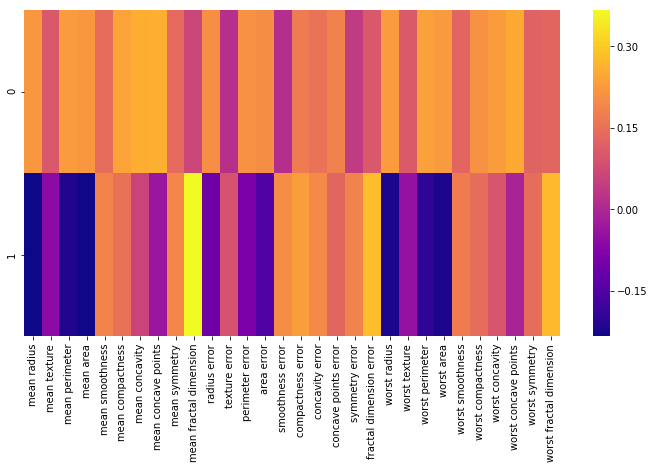

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

### note each principal component is shown in row and higher the number the color changes from purple towards yellow

 Now, we have 2 principal components which represents the original dataset with 30 original features
 
 What happens Next? 
 
  - The above 2 principal components, can be written into a file
  - The file can then be used into a supervised learning algorithm like we have seen before.
  - predictions can then be made on the 2 columns(principal components)
  - since PCA does not tell you which can be independent or dependent variable
  - we can assume pc1 as independent and predict pc2
  or
  - we can assume pc2 as independent and predict pc1
  
 Alternative way
  - From the heat above
    - identify which ever columns are contributing largely to each of the principal components 
    - which ever column has a brighter color indicates that it contributes heavily to that specific principal component
       for example, Columns mean radius,mean perimeter,mean area....worst compactness
    - use these columns for building your supervised learning model
    - if you want to include pc2 as well, then repeat the same process, identify columns which are highly significant in
      pc2 and add that column as well in the supervsied learning model
  

PIPELINE CHAINING LOGISTIC REGRESSION AND PCA

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [7]:
logistic = linear_model.LogisticRegression()


In [9]:
pca = decomposition.PCA()


In [ ]:
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself